In [1]:
from __future__ import print_function
%matplotlib inline
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy

In [2]:
mdtraj.html.enable_notebook

NameError: name 'mdtraj' is not defined

In [3]:
import ipywidgets.

C:\Users\Rohith\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


ImportError: cannot import name 'TrajectoryView'

In [5]:
t = md.load('4_nvt_50ns_its-cluster_Protein_noPBC.xtc', top='4_nvt_50ns_its-cluster_Protein_noPBC.gro')

t_subset = t[:500]
RMSD_CUTOFF=1.5

In [6]:
atom_indices = [a.index for a in t_subset.topology.atoms if a.name == 'CA']
distances = np.empty((t_subset.n_frames, t_subset.n_frames))
for i in range(t_subset.n_frames):
    distances[i] = md.rmsd(t_subset, t_subset, i, atom_indices=atom_indices)


[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

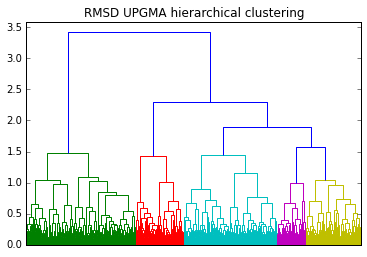

In [8]:
linkage = scipy.cluster.hierarchy.average(distances)

plt.title('RMSD UPGMA hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent', color_threshold=RMSD_CUTOFF)

clusters = scipy.cluster.hierarchy.fcluster(linkage, RMSD_CUTOFF, criterion='distance')

print(clusters)

In [13]:
distances

array([[ 0.        ,  0.05474676,  0.06935932, ...,  0.33727306,
         0.30861044,  0.30492529],
       [ 0.05474676,  0.00061763,  0.04290656, ...,  0.33773988,
         0.30678055,  0.3051579 ],
       [ 0.06935932,  0.04290656,  0.        , ...,  0.3304593 ,
         0.29946446,  0.29580206],
       ..., 
       [ 0.33727306,  0.33773988,  0.3304593 , ...,  0.00043673,
         0.07444072,  0.09047313],
       [ 0.30861044,  0.30678055,  0.29946446, ...,  0.07444072,
         0.        ,  0.06893452],
       [ 0.30492529,  0.3051579 ,  0.29580206, ...,  0.09047313,
         0.06893452,  0.        ]])

In [63]:
beta = 50
index = np.exp(-beta*distances / distances.std()).sum(axis=1).argmax()
print(index)

168


In [22]:
centroid = t[index]
print(centroid)

<mdtraj.Trajectory with 1 frames, 598 atoms, 40 residues, and unitcells>


In [30]:
md.formats.PDBTrajectoryFile.write(centroid,topology='4_nvt_50ns_its-cluster_Protein_noPBC.gro')

TypeError: write() missing 1 required positional argument: 'positions'

In [66]:
import collections
cluster_index = collections.defaultdict(list)

for i, cl in enumerate(clusters):
    cluster_index[cl].append(i)

cluster_reps = {}
for cl, frames in cluster_index.items():
    totdist = []
    for i in frames:
        tot = 0.0
        for j in frames:
            tot += distances[i, j]
        totdist.append(tot)
    m = min(totdist)
    rep = totdist.index(m)
    print(cl, frames[rep])
    cluster_reps[cl] = frames[rep]

print(cluster_reps)

1 433
2 292
3 70
4 161
5 220
{1: 433, 2: 292, 3: 70, 4: 161, 5: 220}


In [69]:
cluster1 = t[433]

In [71]:
cluster1.save_pdb('cluster1_433.pdb')

In [72]:
cluster1.save_pdb('cluster1_433.pdb')

In [73]:
cluster2 = t[292]
cluster2.save_pdb('cluster2_292.pdb')

In [74]:
cluster3 = t[70]
cluster3.save_pdb('cluster3_70.pdb')

In [75]:
cluster4 = t[161]
cluster4.save_pdb('cluster4_161.pdb')

In [77]:
cluster5 = t[220]
cluster5.save_pdb('cluster5_220.pdb')

In [79]:
import pylab

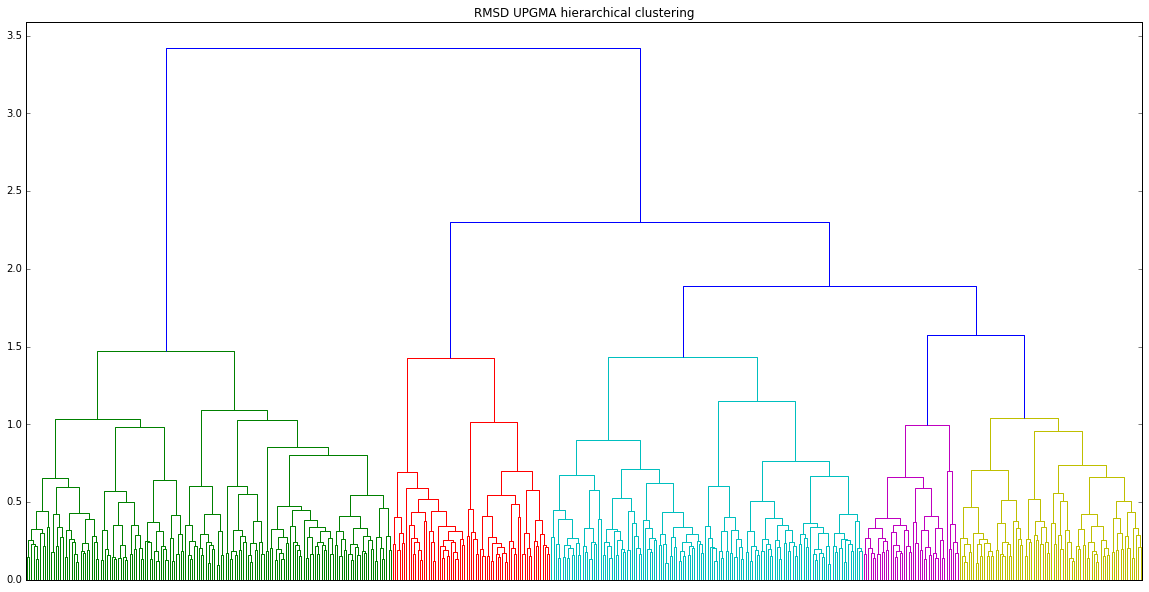

In [81]:
plt.figure(figsize=(20,10))
plt.title('RMSD UPGMA hierarchical clustering')
_ = scipy.cluster.hierarchy.dendrogram(linkage, no_labels=True, count_sort='descendent', color_threshold=RMSD_CUTOFF)
pylab.savefig( "dendrogram.png" )